In [13]:
import matplotlib.pyplot as plt
import matplotlib.colors as color
import numpy as np
import warnings
warnings.filterwarnings("ignore")

# Problem (1)

In [14]:
class Charge:
    def __init__(self,x,y,q):
        self.x=x
        self.y=y
        self.q=q
        return
    def potential(self, xgrid, ygrid): 
        dx = xgrid - self.x
        dy = ygrid - self.y
        r = np.sqrt(dx**2 + dy**2)
        return self.q / r

In [81]:
def neg_charges(n):
    # Create charges
    charge1 = Charge(18, 25, -1)
    charge2 = Charge(18 + n, 25, -1)

    # Create grid
    x = np.linspace(0, 51, 51)
    y = np.linspace(0, 51, 51)
    xgrid, ygrid = np.meshgrid(x, y)

    # Calculate potential
    V = charge1.potential(xgrid, ygrid) + charge2.potential(xgrid, ygrid)

    # Determine contour levels
    contour_levels = np.linspace(-1,0,10)

    # Plot potential
    plt.imshow(V, origin='lower')
    plt.colorbar()
    plt.contour(V, levels=contour_levels, colors='black')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Potential Generated by Two Negative Charges')
    plt.gca().set_aspect('equal')
    plt.show()



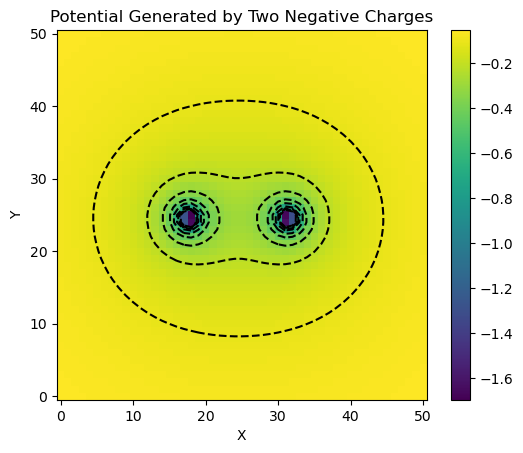

In [82]:
neg_charges(14)

# Problem (2)

For dipole, keep everything the same but one charge must have a charge of +1 while the other has a charge of -1

In [83]:
def dipole(n):
    # Create charges
    charge1 = Charge(18, 25, -1)
    charge2 = Charge(18 + n, 25, +1)

    # Create grid
    x = np.linspace(0, 51, 51)
    y = np.linspace(0, 51, 51)
    xgrid, ygrid = np.meshgrid(x, y)

    # Calculate potential
    V = charge1.potential(xgrid, ygrid) + charge2.potential(xgrid, ygrid)

    # Determine contour levels
    contour_levels = np.linspace(-1,1, 11)

    # Plot potential
    plt.imshow(V, origin='lower')
    plt.colorbar()
    plt.contour(V, levels=contour_levels, colors='black')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Potential Generated by a Dipole')
    plt.gca().set_aspect('equal')
    plt.show()

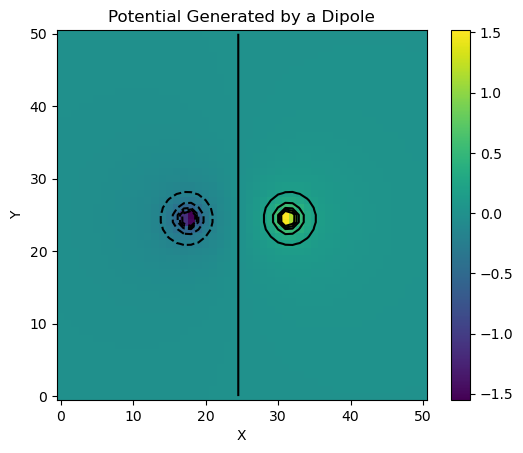

In [84]:
dipole(14)

# Problem (3)

Will create a line of alternating charges.

In [85]:
def arrangement(n, d):
    # Create grid
    x = np.linspace(0, 51, 51)
    y = np.linspace(0, 51, 51)
    xgrid, ygrid = np.meshgrid(x, y)

    
    # Create charges along diagonal 
    q = 20 # Charge magnitude
    chargelist = np.array([], dtype=object)
    center = np.array([25.5, 25.5])
    
    for i in range(n): 
        da = i/d
        posx = np.array([center[0]+da, center[0]-da])
        posy = np.array([center[1]+da, center[1]-da])
        if (i%2==0):
            chargelist = np.append(chargelist, Charge(posx[0], posy[0], +q))
        else:
            chargelist = np.append(chargelist, Charge(posx[1], posy[1], -q))

    # Calculate total potential (superposition)
    V_tot = 0
    for num, _ in np.ndenumerate(chargelist):
        V_tot += chargelist[num].potential(xgrid, ygrid)
    
    # Determine contour levels
    contour_levels = np.linspace(-5,5, 11)
    
    # Plot potential
    plt.imshow(V_tot, origin='lower')
    plt.colorbar()
    plt.contour(V_tot, levels=contour_levels, colors='black')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Alternating Charges on Diagonal (From Far Away)')
    plt.gca().set_aspect('equal')
    plt.show()

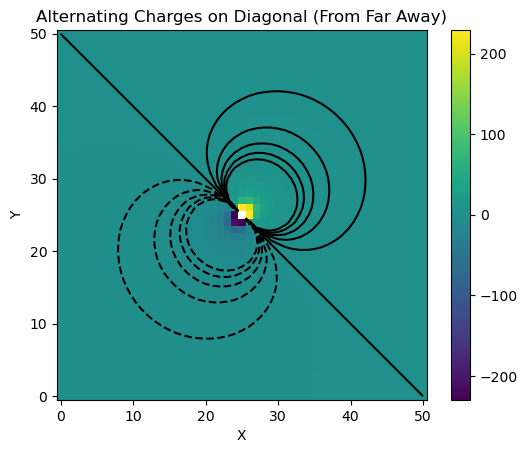

In [86]:
arrangement(52, 100)

#### Caption:

At very large distances, the monopole moment term goes to 0; $Q = \int \rho (\vec{r}) d\tau=0$. This means that, at large distances, the dipole term contributes the most to the elctric potential and this arrangement acts as a dipole. 

In the plot, this can be seen using the contour lines, which are the same as a dipole. The diagonal equipotential line equidistant from the end charges [which runs from $(0, 50) \to (50, 0)$] highlights the dipole-like nature of the arrangement at large distances.

# Problem (4)

In [25]:
def e_field(n):
    # Create charges
    charge1 = Charge(18, 25, -1)
    charge2 = Charge(18 + n, 25, +1)

    # Create grid
    x = np.linspace(0, 51, 51)
    y = np.linspace(0, 51, 51)
    xgrid, ygrid = np.meshgrid(x, y)

    # Calculate potential
    V = charge1.potential(xgrid, ygrid) + charge2.potential(xgrid, ygrid)

    # Calculate electric field (negative gradient of potential)
    E1, E2 = np.gradient(V)
    angle = np.degrees(np.arctan2(-E2, -E1))

    # Plot
    plt.imshow(angle, cmap='hsv', origin='lower')
    plt.colorbar()
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Electric Field of Dipole')


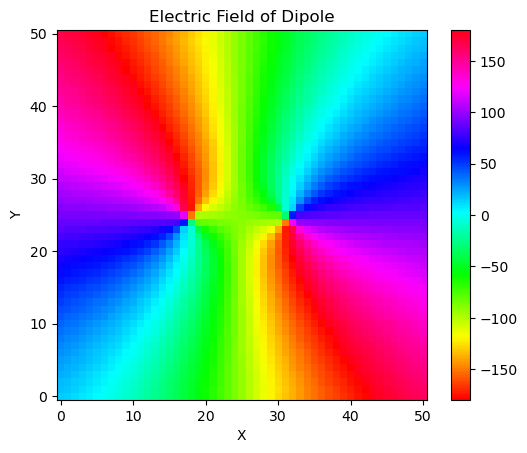

In [26]:
e_field(14)

# Problem (5)

#### Why is the potential method simpler?

Calculating the electric field from the potential instead of directly from Coulomb's law is easier because the direction of $\vec{E}$ does not need to be calculated directly for every single point on the grid and for every single charge using the formula below. Further, there is no need to do vector addition to find the total electric field components from the individual charges.

$$\vec{E}=\frac{1}{4\pi \epsilon_0} \frac{q}{\lvert \vec{r} \rvert^2} \hat{r}$$

Instead, the direction is determined by a numerical calculation (the gradient) which is much easier to do.  Essentially, calculating the electric field using the gradient of the potential requires less computations.

#### What are the weaknesses of the potential method?

Calculating the electric field via the gradient may introduce some extra numerical errors; instead of doing one calculation to calculate the electric field (Coulomb's law), you are doing two (finding potential, then gradient). Additionally, in some dynamical cases it is not possible to define a potential as then the curl of the electric field wouldn't be zero ($\vec{\nabla}\times\vec{E}\neq 0$).